An example of a training a feed-fordward neural network with hidden layer. 

In [1]:
%matplotlib inline
import numpy as np
import NeuralNetworkDrawer as nnd
import matplotlib.pyplot as plt

#Training data for network: a && (b || c)
#Note this is not the complete logic table!

X=np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

y=np.array([[0],[0],[1],[1]])

In [2]:
#Number of training epochs 
epochs=100000

#randomly initialize weights between input -> hidden layer -> output
w0 = 2*np.random.random((3,4)) - 1 #3 inputs to 4 hidden layers
w1 = 2*np.random.random((4,1)) - 1 #4 hidden layers to 1 output

print(w0)
print(w1)

[[ 0.75275101 -0.41847814 -0.29255132 -0.05988945]
 [-0.96134951 -0.94911463 -0.97073992 -0.71883958]
 [ 0.71026885  0.73944105  0.55481994 -0.78057986]]
[[ 0.55628645]
 [ 0.48265319]
 [ 0.2252551 ]
 [-0.30616455]]


In [3]:
def sigmoid(x):
    #logistic or sigmoid activation function
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    #derivative of activation function
    return x*(1-x)

Error= 0.4964397280567947


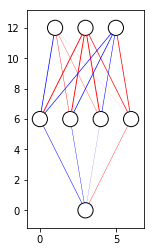

Error= 0.09634294126979738


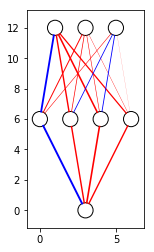

Error= 0.05128546845284124


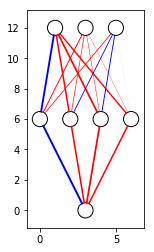

Error= 0.037861469377179324


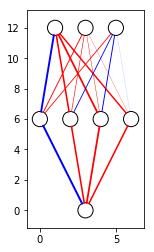

Error= 0.031051011324757502


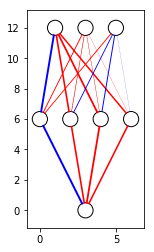

Error= 0.0014391325283622373


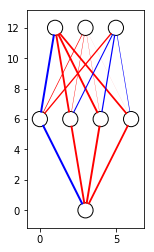

In [4]:
#Store training errors vs iteration for plotting later
errx=[]
erry=[]

#Train the network
for i in range(epochs):
    #feed forward
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, w0))
    layer_2 = sigmoid(np.dot(layer_1, w1))

    layer_2_err = y - layer_2
    layer_2_delta = layer_2_err*dsigmoid(layer_2)
    
    layer_1_err = layer_2_delta.dot(w1.T)
    layer_1_delta = layer_1_err*dsigmoid(layer_1)
    
    w1 += layer_1.T.dot(layer_2_delta)
    w0 += layer_0.T.dot(layer_1_delta)
    
    #Periodically print current error and draw the network
    if ((i%100)==0 and i<500) or i==epochs-1:
        print("Error=", np.mean(np.abs(layer_2_err)))
        network = nnd.NeuralNetwork()
        network.add_layer(1, 4*sigmoid(w1)-2)
        network.add_layer(4, 4*sigmoid(w0)-2)
        network.add_layer(3)
        network.draw(save=False, outfile="anim/plt%04d.png"%i)
        
    errx.append(i)
    erry.append(np.mean(np.abs(layer_2_err)))

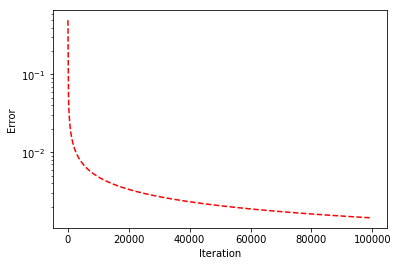

In [5]:
#Plot the Error vs Iteration
plt.plot(errx,erry, 'r--')
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.show()

In [6]:
#Test examples for trained inputs
def testNet(X,ytrue):
    l0=X
    l1=sigmoid(np.dot(l0,w0))
    l2=sigmoid(np.dot(l1,w1))

    print("Network returned %f, expected %d."%(l2,ytrue))
    #return l2

testNet([0,0,1],0)
testNet([0,1,1],0)
testNet([1,1,1],1)
testNet([1,0,1],1)

Network returned 0.001335, expected 0.
Network returned 0.001144, expected 0.
Network returned 0.998331, expected 1.
Network returned 0.998392, expected 1.


In [7]:
#Test examples for extrapolated inputs
testNet([0,0,0],0)
testNet([0,1,0],0)
testNet([1,1,0],1)
testNet([1,0,0],0)

Network returned 0.191163, expected 0.
Network returned 0.103124, expected 0.
Network returned 0.999310, expected 1.
Network returned 0.999300, expected 0.
